In [1]:
import uproot  # For loading ROOT files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from dataAnalyse import CCV2
from torch_geometric.data import DataLoader 

In [3]:
testpath = "/vols/cms/mm1221/Data/5pi/test/"  # Replace with your ROOT file path
data_test = CCV2(testpath, max_events=12000, inp = 'test')

test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])

### Loading tracksters data


100%|█████████████████████████████████████████████| 1/1 [00:24<00:00, 24.67s/it]
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [7]:
data_path = '/vols/cms/mm1221/Data/5pi/test/raw/test.root'
data_file = uproot.open(data_path)

Track_ind = data_file['tracksters;1']['vertices_indexes'].array()
GT_ind = data_file['simtrackstersCP;1']['vertices_indexes'].array()
GT_bc = data_file['simtrackstersCP;1']['barycenter_x'].array()
energies = data_file['clusters;2']['energy'].array()
LC_x = data_file['clusters;2']['position_x'].array()
LC_y = data_file['clusters;2']['position_y'].array()
LC_z = data_file['clusters;2']['position_z'].array()
LC_eta = data_file['clusters;2']['position_eta'].array()
MT_ind = data_file['trackstersMerged;1']['vertices_indexes'].array()

skim_mask = []
for e in GT_bc:
    if 1 <= len(e) <= 5:
        skim_mask.append(True)
    else:
        skim_mask.append(False)
        
GT_ind = GT_ind[skim_mask]
energies = energies[skim_mask]
Track_ind = Track_ind[skim_mask]
MT_ind = MT_ind[skim_mask]

LC_x = LC_x[skim_mask]
LC_y = LC_y[skim_mask]
LC_z = LC_z[skim_mask]
LC_eta = LC_eta[skim_mask]

In [8]:
#0.0001,32,64,3,0.2,8,128
# Initialize model and load state dictionary
from model import Net
model = Net(64, 3, 0.2, 128)
checkpoint= torch.load('/vols/cms/mm1221/hgcal/elec5/Track/StaticEdge/results/init/results_lr0.0001_bs32_hd64_nl3_do0.2_k8_cd128/best_model.pt',  map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=15, out_features=64, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ELU(alpha=1.0)
  )
  (convs): ModuleList(
    (0-2): 3 x CustomStaticEdgeConv(
      (nn_module): Sequential(
        (0): Linear(in_features=128, out_features=64, bias=True)
        (1): ELU(alpha=1.0)
        (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (output): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=16, out_features=128, bias=True)
  )
)

In [9]:
from torch_geometric.nn import knn_graph

all_predictions = []  # List to store predictions for all events

# Loop through all events in the test dataset
for i, data in enumerate(data_test):
    print(f"Processing event {i+1}/{len(data_test)}...")

    # Compute k-nearest neighbor graph for the event
    edge_index = knn_graph(data.x, k=8)  # Adjust 'k' as needed
    
    # Generate predictions for the event
    predictions = model(data.x, edge_index, 1)
    
    # Store predictions
    all_predictions.append(predictions[0].detach().cpu().numpy())  # Convert to numpy if needed

# Convert list of predictions to a single numpy array
all_predictions = np.array(all_predictions)

# Print result
print("Predictions for all events shape:", all_predictions.shape)


Processing event 1/2947...
Processing event 2/2947...
Processing event 3/2947...
Processing event 4/2947...
Processing event 5/2947...
Processing event 6/2947...
Processing event 7/2947...
Processing event 8/2947...
Processing event 9/2947...
Processing event 10/2947...
Processing event 11/2947...
Processing event 12/2947...
Processing event 13/2947...
Processing event 14/2947...
Processing event 15/2947...
Processing event 16/2947...
Processing event 17/2947...
Processing event 18/2947...
Processing event 19/2947...
Processing event 20/2947...
Processing event 21/2947...
Processing event 22/2947...
Processing event 23/2947...
Processing event 24/2947...
Processing event 25/2947...
Processing event 26/2947...
Processing event 27/2947...
Processing event 28/2947...
Processing event 29/2947...
Processing event 30/2947...
Processing event 31/2947...
Processing event 32/2947...
Processing event 33/2947...
Processing event 34/2947...
Processing event 35/2947...
Processing event 36/2947...
P

Processing event 304/2947...
Processing event 305/2947...
Processing event 306/2947...
Processing event 307/2947...
Processing event 308/2947...
Processing event 309/2947...
Processing event 310/2947...
Processing event 311/2947...
Processing event 312/2947...
Processing event 313/2947...
Processing event 314/2947...
Processing event 315/2947...
Processing event 316/2947...
Processing event 317/2947...
Processing event 318/2947...
Processing event 319/2947...
Processing event 320/2947...
Processing event 321/2947...
Processing event 322/2947...
Processing event 323/2947...
Processing event 324/2947...
Processing event 325/2947...
Processing event 326/2947...
Processing event 327/2947...
Processing event 328/2947...
Processing event 329/2947...
Processing event 330/2947...
Processing event 331/2947...
Processing event 332/2947...
Processing event 333/2947...
Processing event 334/2947...
Processing event 335/2947...
Processing event 336/2947...
Processing event 337/2947...
Processing eve

Processing event 588/2947...
Processing event 589/2947...
Processing event 590/2947...
Processing event 591/2947...
Processing event 592/2947...
Processing event 593/2947...
Processing event 594/2947...
Processing event 595/2947...
Processing event 596/2947...
Processing event 597/2947...
Processing event 598/2947...
Processing event 599/2947...
Processing event 600/2947...
Processing event 601/2947...
Processing event 602/2947...
Processing event 603/2947...
Processing event 604/2947...
Processing event 605/2947...
Processing event 606/2947...
Processing event 607/2947...
Processing event 608/2947...
Processing event 609/2947...
Processing event 610/2947...
Processing event 611/2947...
Processing event 612/2947...
Processing event 613/2947...
Processing event 614/2947...
Processing event 615/2947...
Processing event 616/2947...
Processing event 617/2947...
Processing event 618/2947...
Processing event 619/2947...
Processing event 620/2947...
Processing event 621/2947...
Processing eve

Processing event 884/2947...
Processing event 885/2947...
Processing event 886/2947...
Processing event 887/2947...
Processing event 888/2947...
Processing event 889/2947...
Processing event 890/2947...
Processing event 891/2947...
Processing event 892/2947...
Processing event 893/2947...
Processing event 894/2947...
Processing event 895/2947...
Processing event 896/2947...
Processing event 897/2947...
Processing event 898/2947...
Processing event 899/2947...
Processing event 900/2947...
Processing event 901/2947...
Processing event 902/2947...
Processing event 903/2947...
Processing event 904/2947...
Processing event 905/2947...
Processing event 906/2947...
Processing event 907/2947...
Processing event 908/2947...
Processing event 909/2947...
Processing event 910/2947...
Processing event 911/2947...
Processing event 912/2947...
Processing event 913/2947...
Processing event 914/2947...
Processing event 915/2947...
Processing event 916/2947...
Processing event 917/2947...
Processing eve

Processing event 1171/2947...
Processing event 1172/2947...
Processing event 1173/2947...
Processing event 1174/2947...
Processing event 1175/2947...
Processing event 1176/2947...
Processing event 1177/2947...
Processing event 1178/2947...
Processing event 1179/2947...
Processing event 1180/2947...
Processing event 1181/2947...
Processing event 1182/2947...
Processing event 1183/2947...
Processing event 1184/2947...
Processing event 1185/2947...
Processing event 1186/2947...
Processing event 1187/2947...
Processing event 1188/2947...
Processing event 1189/2947...
Processing event 1190/2947...
Processing event 1191/2947...
Processing event 1192/2947...
Processing event 1193/2947...
Processing event 1194/2947...
Processing event 1195/2947...
Processing event 1196/2947...
Processing event 1197/2947...
Processing event 1198/2947...
Processing event 1199/2947...
Processing event 1200/2947...
Processing event 1201/2947...
Processing event 1202/2947...
Processing event 1203/2947...
Processing

Processing event 1468/2947...
Processing event 1469/2947...
Processing event 1470/2947...
Processing event 1471/2947...
Processing event 1472/2947...
Processing event 1473/2947...
Processing event 1474/2947...
Processing event 1475/2947...
Processing event 1476/2947...
Processing event 1477/2947...
Processing event 1478/2947...
Processing event 1479/2947...
Processing event 1480/2947...
Processing event 1481/2947...
Processing event 1482/2947...
Processing event 1483/2947...
Processing event 1484/2947...
Processing event 1485/2947...
Processing event 1486/2947...
Processing event 1487/2947...
Processing event 1488/2947...
Processing event 1489/2947...
Processing event 1490/2947...
Processing event 1491/2947...
Processing event 1492/2947...
Processing event 1493/2947...
Processing event 1494/2947...
Processing event 1495/2947...
Processing event 1496/2947...
Processing event 1497/2947...
Processing event 1498/2947...
Processing event 1499/2947...
Processing event 1500/2947...
Processing

Processing event 1763/2947...
Processing event 1764/2947...
Processing event 1765/2947...
Processing event 1766/2947...
Processing event 1767/2947...
Processing event 1768/2947...
Processing event 1769/2947...
Processing event 1770/2947...
Processing event 1771/2947...
Processing event 1772/2947...
Processing event 1773/2947...
Processing event 1774/2947...
Processing event 1775/2947...
Processing event 1776/2947...
Processing event 1777/2947...
Processing event 1778/2947...
Processing event 1779/2947...
Processing event 1780/2947...
Processing event 1781/2947...
Processing event 1782/2947...
Processing event 1783/2947...
Processing event 1784/2947...
Processing event 1785/2947...
Processing event 1786/2947...
Processing event 1787/2947...
Processing event 1788/2947...
Processing event 1789/2947...
Processing event 1790/2947...
Processing event 1791/2947...
Processing event 1792/2947...
Processing event 1793/2947...
Processing event 1794/2947...
Processing event 1795/2947...
Processing

Processing event 2055/2947...
Processing event 2056/2947...
Processing event 2057/2947...
Processing event 2058/2947...
Processing event 2059/2947...
Processing event 2060/2947...
Processing event 2061/2947...
Processing event 2062/2947...
Processing event 2063/2947...
Processing event 2064/2947...
Processing event 2065/2947...
Processing event 2066/2947...
Processing event 2067/2947...
Processing event 2068/2947...
Processing event 2069/2947...
Processing event 2070/2947...
Processing event 2071/2947...
Processing event 2072/2947...
Processing event 2073/2947...
Processing event 2074/2947...
Processing event 2075/2947...
Processing event 2076/2947...
Processing event 2077/2947...
Processing event 2078/2947...
Processing event 2079/2947...
Processing event 2080/2947...
Processing event 2081/2947...
Processing event 2082/2947...
Processing event 2083/2947...
Processing event 2084/2947...
Processing event 2085/2947...
Processing event 2086/2947...
Processing event 2087/2947...
Processing

Processing event 2348/2947...
Processing event 2349/2947...
Processing event 2350/2947...
Processing event 2351/2947...
Processing event 2352/2947...
Processing event 2353/2947...
Processing event 2354/2947...
Processing event 2355/2947...
Processing event 2356/2947...
Processing event 2357/2947...
Processing event 2358/2947...
Processing event 2359/2947...
Processing event 2360/2947...
Processing event 2361/2947...
Processing event 2362/2947...
Processing event 2363/2947...
Processing event 2364/2947...
Processing event 2365/2947...
Processing event 2366/2947...
Processing event 2367/2947...
Processing event 2368/2947...
Processing event 2369/2947...
Processing event 2370/2947...
Processing event 2371/2947...
Processing event 2372/2947...
Processing event 2373/2947...
Processing event 2374/2947...
Processing event 2375/2947...
Processing event 2376/2947...
Processing event 2377/2947...
Processing event 2378/2947...
Processing event 2379/2947...
Processing event 2380/2947...
Processing

Processing event 2632/2947...
Processing event 2633/2947...
Processing event 2634/2947...
Processing event 2635/2947...
Processing event 2636/2947...
Processing event 2637/2947...
Processing event 2638/2947...
Processing event 2639/2947...
Processing event 2640/2947...
Processing event 2641/2947...
Processing event 2642/2947...
Processing event 2643/2947...
Processing event 2644/2947...
Processing event 2645/2947...
Processing event 2646/2947...
Processing event 2647/2947...
Processing event 2648/2947...
Processing event 2649/2947...
Processing event 2650/2947...
Processing event 2651/2947...
Processing event 2652/2947...
Processing event 2653/2947...
Processing event 2654/2947...
Processing event 2655/2947...
Processing event 2656/2947...
Processing event 2657/2947...
Processing event 2658/2947...
Processing event 2659/2947...
Processing event 2660/2947...
Processing event 2661/2947...
Processing event 2662/2947...
Processing event 2663/2947...
Processing event 2664/2947...
Processing

Processing event 2911/2947...
Processing event 2912/2947...
Processing event 2913/2947...
Processing event 2914/2947...
Processing event 2915/2947...
Processing event 2916/2947...
Processing event 2917/2947...
Processing event 2918/2947...
Processing event 2919/2947...
Processing event 2920/2947...
Processing event 2921/2947...
Processing event 2922/2947...
Processing event 2923/2947...
Processing event 2924/2947...
Processing event 2925/2947...
Processing event 2926/2947...
Processing event 2927/2947...
Processing event 2928/2947...
Processing event 2929/2947...
Processing event 2930/2947...
Processing event 2931/2947...
Processing event 2932/2947...
Processing event 2933/2947...
Processing event 2934/2947...
Processing event 2935/2947...
Processing event 2936/2947...
Processing event 2937/2947...
Processing event 2938/2947...
Processing event 2939/2947...
Processing event 2940/2947...
Processing event 2941/2947...
Processing event 2942/2947...
Processing event 2943/2947...
Processing

/tmp/ipykernel_2931563/482007930.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_predictions = np.array(all_predictions)


In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# Initialize lists to store cluster labels and clustering times
all_cluster_labels = []       # List to store cluster labels for all events
all_clustering_times = []     # List to store time taken for clustering each event

# Parameters for Agglomerative Clustering
distance_threshold = 0.7  # Adjust this value based on your data
linkage = 'average'           # Linkage criteria: 'ward', 'complete', 'average', 'single'
metric = 'cosine'             # Distance metric: 'cosine', 'euclidean', etc.
compute_distances = True      # Whether to compute distances between clusters

# Total number of events (for progress tracking)
total_events = len(all_predictions)

# Loop through all events in all_predictions
for i, pred in enumerate(all_predictions):
    #print(f"Processing event {i+1}/{total_events}...")
    
    # Check if there are less than 2 samples (nodes)
    if len(pred) < 2:
        cluster_labels = np.ones(len(pred), dtype=int)  # Assign all nodes to cluster 1
    else:
        # Initialize AgglomerativeClustering with specified parameters
        agglomerative = AgglomerativeClustering(
            n_clusters=None,                  # Let the algorithm determine the number of clusters
            distance_threshold=distance_threshold,
            linkage=linkage,
            metric=metric,
            compute_distances=compute_distances
        )
        
        # Record the start time
        start_time = time.time()
        
        # Perform clustering
        cluster_labels = agglomerative.fit_predict(pred)  # pred = predictions for this event
        
        # Record the end time
        end_time = time.time()
        
        # Calculate the time taken for clustering
        clustering_time = end_time - start_time
        all_clustering_times.append(clustering_time)
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels and times to NumPy arrays
all_cluster_labels = np.array(all_cluster_labels)
all_clustering_times = np.array(all_clustering_times)

# Print results
print("\nClustering Results:")
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Print timing information
total_time = all_clustering_times.sum()
average_time = all_clustering_times.mean()
print(f"\nTotal clustering time: {total_time:.2f} seconds")
print(f"Average clustering time per event: {average_time:.4f} seconds")





"""
# Initialize recon_ind as an empty list
recon_ind = []

# Loop through each event
for event_idx, labels in enumerate(all_cluster_labels):
    event_clusters = {}  # Dictionary to store clusters for this event
    
    # Loop through each cluster label and corresponding track indices
    for cluster_idx, cluster_label in enumerate(labels):
        if cluster_label not in event_clusters:
            event_clusters[cluster_label] = []
        event_clusters[cluster_label].extend(Track_ind[event_idx][cluster_idx])
    
    # Append the clusters for this event as a list
    recon_ind.append([event_clusters[label] for label in sorted(event_clusters.keys())])

df_scores = calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta)

import pandas as pd

# Ensure 'cp_id' and 'trackster_id' are numeric for both dataframes
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Define a function to calculate efficiency and purity
def calculate_efficiency_purity(df, model_name):
    # ----- Efficiency Calculation -----
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

    # ----- Purity Calculation -----
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0

    # Print results for the model
    print(f"\nModel: {model_name}")
    print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")
    print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")
    return cp_valid, tst_valid
# Calculate for both models
cp_valid, tst_valid = calculate_efficiency_purity(df_scores, "Your Model")

calculate_efficiency_purity(df_CERN, "CERN Model")


"""



Clustering Results:
Shape of all_cluster_labels: (2947,)
Cluster labels for first event: [1 0 0 0 0 0 0 0 0 0 1 1 0 0 0]

Total clustering time: 0.96 seconds
Average clustering time per event: 0.0003 seconds


/tmp/ipykernel_2931563/3327748953.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


'\n# Initialize recon_ind as an empty list\nrecon_ind = []\n\n# Loop through each event\nfor event_idx, labels in enumerate(all_cluster_labels):\n    event_clusters = {}  # Dictionary to store clusters for this event\n    \n    # Loop through each cluster label and corresponding track indices\n    for cluster_idx, cluster_label in enumerate(labels):\n        if cluster_label not in event_clusters:\n            event_clusters[cluster_label] = []\n        event_clusters[cluster_label].extend(Track_ind[event_idx][cluster_idx])\n    \n    # Append the clusters for this event as a list\n    recon_ind.append([event_clusters[label] for label in sorted(event_clusters.keys())])\n\ndf_scores = calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta)\n\nimport pandas as pd\n\n# Ensure \'cp_id\' and \'trackster_id\' are numeric for both dataframes\ndf_scores[\'cp_id\'] = pd.to_numeric(df_scores[\'cp_id\'], errors=\'coerce\')\ndf_scores[\'trackster_id\'] = pd.to_numeric(df_

# Score Calculations

In [22]:
# Initialize recon_ind as an empty list
recon_ind = []

# Loop through each event
for event_idx, labels in enumerate(all_cluster_labels):
    event_clusters = {}  # Dictionary to store clusters for this event
    
    # Loop through each cluster label and corresponding track indices
    for cluster_idx, cluster_label in enumerate(labels):
        if cluster_label not in event_clusters:
            event_clusters[cluster_label] = []
        event_clusters[cluster_label].extend(Track_ind[event_idx][cluster_idx])
    
    # Append the clusters for this event as a list
    recon_ind.append([event_clusters[label] for label in sorted(event_clusters.keys())])


In [23]:
def calculate_sim_to_reco_score(CaloParticle, energies_indices, ReconstructedTrackster):
    """
    Calculate the sim-to-reco score for a given CaloParticle and ReconstructedTrackster.
    
    Parameters:
    - CaloParticle: array of DetIds in the CaloParticle.
    - energies_indices: array of energies associated with all DetIds (indexed by DetId).
    - ReconstructedTrackster: array of DetIds in the reconstructed Trackster.
    
    Returns:
    - sim_to_reco_score: the calculated sim-to-reco score.
    """
    numerator = 0.0
    denominator = 0.0

    # Calculate total energy of the CaloParticle
    total_energy_caloparticle = sum(energies_indices[det_id] for det_id in CaloParticle)
    if total_energy_caloparticle == 0:
        return 1.0  # No energy in the CaloParticle implies perfect mismatch

    # Calculate total energy of the ReconstructedTrackster
    total_energy_trackster = sum(energies_indices[det_id] for det_id in ReconstructedTrackster)

    # Iterate over all DetIds in the CaloParticle
    for det_id in CaloParticle:
        energy_k = energies_indices[det_id]  # Energy for the current DetId in CaloParticle

        # Fraction of energy in the Trackster (fr_k^TST)
        fr_tst_k = 1 if det_id in ReconstructedTrackster else 0.0

        # Fraction of energy in the CaloParticle (fr_k^SC)
        fr_sc_k = 1

        # Update numerator using the min function
        numerator += min(
            (fr_tst_k - fr_sc_k) ** 2,  # First term in the min function
            fr_sc_k ** 2                # Second term in the min function
        ) * (energy_k ** 2)

        # Update denominator
        denominator += (fr_sc_k ** 2) * (energy_k ** 2)

    # Calculate score
    sim_to_reco_score = numerator / denominator if denominator != 0 else 1.0
    return sim_to_reco_score

def calculate_reco_to_sim_score(ReconstructedTrackster, energies_indices, CaloParticle):
    """
    Calculate the reco-to-sim score for a given ReconstructedTrackster and CaloParticle.

    Parameters:
    - ReconstructedTrackster: array of DetIds in the ReconstructedTrackster.
    - energies_indices: array of energies associated with all DetIds (indexed by DetId).
    - CaloParticle: array of DetIds in the CaloParticle.

    Returns:
    - reco_to_sim_score: the calculated reco-to-sim score.
    """
    numerator = 0.0
    denominator = 0.0

    # Calculate total energy of the ReconstructedTrackster
    total_energy_trackster = sum(energies_indices[det_id] for det_id in ReconstructedTrackster)
    if total_energy_trackster == 0:
        return 1.0  # No energy in the Trackster implies perfect mismatch

    # Calculate total energy of the CaloParticle
    total_energy_caloparticle = sum(energies_indices[det_id] for det_id in CaloParticle)

    # Iterate over all DetIds in the ReconstructedTrackster
    for det_id in ReconstructedTrackster:
        energy_k = energies_indices[det_id]  # Energy for the current DetId in the Trackster

        # Fraction of energy in the Trackster (fr_k^TST)
        fr_tst_k = 1

        # Fraction of energy in the CaloParticle (fr_k^MC)
        fr_sc_k = 1 if det_id in CaloParticle else 0.0

        # Update numerator using the min function
        numerator += min(
            (fr_tst_k - fr_sc_k) ** 2,  # First term in the min function
            fr_tst_k ** 2               # Second term in the min function
        ) * (energy_k ** 2)

        # Update denominator
        denominator += (fr_tst_k ** 2) * (energy_k ** 2)

    # Calculate score
    reco_to_sim_score = numerator / denominator if denominator != 0 else 1.0
    return reco_to_sim_score



In [24]:
import pandas as pd
import numpy as np
from tqdm import tqdm


def calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta):
    """
    Calculate sim-to-reco and reco-to-sim scores for all CaloParticle and ReconstructedTrackster combinations across all events.

    Parameters:
    - GT_ind: List of CaloParticle indices for all events.
    - energies: List of energy arrays for all events.
    - recon_ind: List of ReconstructedTrackster indices for all events.
    - LC_x, LC_y, LC_z, LC_eta: Lists of x, y, z positions and eta values for all DetIds across events.

    Returns:
    - DataFrame containing scores and additional features for each CaloParticle-Trackster combination across all events.
    """
    # Initialize an empty list to store results
    all_results = []

    # Loop over all events with a progress bar
    for event_index in tqdm(range(100), desc="Processing events"):
        caloparticles = GT_ind[event_index]  # Indices for all CaloParticles in the event
        tracksters = recon_ind[event_index]  # Indices for all ReconstructedTracksters in the event
        event_energies = energies[event_index]  # Energies for this event

        # Extract layer cluster positions and eta for this event
        event_x = np.array(LC_x[event_index])
        event_y = np.array(LC_y[event_index])
        event_z = np.array(LC_z[event_index])
        event_eta = np.array(LC_eta[event_index])

        # Compute barycenter for each CaloParticle
        cp_barycenters = []
        cp_avg_etas = []
        for caloparticle in caloparticles:
            # Compute barycenter (x, y, z)
            barycenter_x = np.mean([event_x[det_id] for det_id in caloparticle])
            barycenter_y = np.mean([event_y[det_id] for det_id in caloparticle])
            barycenter_z = np.mean([event_z[det_id] for det_id in caloparticle])
            cp_barycenters.append(np.array([barycenter_x, barycenter_y, barycenter_z]))
            
            # Compute average eta
            avg_eta = np.mean([event_eta[det_id] for det_id in caloparticle])
            cp_avg_etas.append(avg_eta)

        # Compute separation between two CaloParticles if at least two exist
        if len(cp_barycenters) >= 2:
            cp_separation = np.linalg.norm(cp_barycenters[0] - cp_barycenters[1])
        else:
            cp_separation = 0.0

        # Loop over all CaloParticles
        for calo_idx, caloparticle in enumerate(caloparticles):
            # Loop over all Tracksters
            for trackster_idx, trackster in enumerate(tracksters):
                # Calculate sim-to-reco score
                sim_to_reco_score = calculate_sim_to_reco_score(caloparticle, event_energies, trackster)
                # Calculate reco-to-sim score
                reco_to_sim_score = calculate_reco_to_sim_score(trackster, event_energies, caloparticle)

                # Calculate total energy for CaloParticle and Trackster
                cp_energy = np.sum([event_energies[det_id] for det_id in caloparticle])
                trackster_energy = np.sum([event_energies[det_id] for det_id in trackster])

                # Calculate energy difference ratio
                energy_diff_ratio = (trackster_energy - cp_energy) / cp_energy if cp_energy != 0 else None

                # Append results
                all_results.append({
                    "event_index": event_index,
                    "cp_id": calo_idx,
                    "trackster_id": trackster_idx,
                    "sim_to_reco_score": sim_to_reco_score,
                    "reco_to_sim_score": reco_to_sim_score,
                    "cp_energy": cp_energy,
                    "trackster_energy": trackster_energy,
                    "cp_avg_eta": cp_avg_etas[calo_idx],
                    "cp_separation": cp_separation,
                    "energy_diff_ratio": energy_diff_ratio
                })

    # Convert results to a DataFrame
    df = pd.DataFrame(all_results)
    return df


In [25]:

df_scores = calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta)
df_CERN = calculate_all_event_scores(GT_ind, energies, MT_ind, LC_x, LC_y, LC_z, LC_eta)

Processing events: 100%|██████████████████████| 100/100 [00:55<00:00,  1.81it/s]


In [26]:
# Assuming 'df' is your dataframe
max_sim_to_reco_score = df_scores['sim_to_reco_score'].max()
max_reco_to_sim_score = df_scores['reco_to_sim_score'].max()

print("Maximum sim-to-reco score:", max_sim_to_reco_score)
print("Maximum reco-to-sim score:", max_reco_to_sim_score)

Maximum sim-to-reco score: 1.0
Maximum reco-to-sim score: 1.0


# Purity + Efficiency

In [27]:
import pandas as pd

# Ensure 'cp_id' and 'trackster_id' are numeric for both dataframes
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Define a function to calculate efficiency, purity, duplicate rate, and merge rate
def calculate_metrics(df, model_name):
    # ----- Efficiency Calculation -----
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

    # ----- Purity Calculation -----
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0

    # ----- Duplicate (Trackster Splitting) Calculation -----
    cp_trackster_counts = cp_valid.groupby(['event_index', 'cp_id'])['trackster_id'].nunique()
    duplicate_cp = cp_trackster_counts[cp_trackster_counts > 1].count()
    duplicate_rate = duplicate_cp / total_cp if total_cp > 0 else 0

    # ----- Merge Rate Calculation -----
    tst_cp_counts = tst_valid.groupby(['event_index', 'trackster_id'])['cp_id'].nunique()
    merged_tst = tst_cp_counts[tst_cp_counts > 1].count()
    merge_rate = merged_tst / total_tst if total_tst > 0 else 0

    # Print results for the model
    print(f"\nModel: {model_name}")
    print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")
    print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")
    print(f"Duplicate Rate: {duplicate_rate:.4f} ({duplicate_cp} CPs split into multiple Tracksters out of {total_cp} total CPs)")
    print(f"Merge Rate: {merge_rate:.4f} ({merged_tst} Tracksters merged with multiple CPs out of {total_tst} total Tracksters)")
    
    return {
        'efficiency': efficiency,
        'purity': purity,
        'duplicate_rate': duplicate_rate,
        'merge_rate': merge_rate,
        'cp_valid': cp_valid,
        'tst_valid': tst_valid
    }

# Calculate for both models
your_model_metrics = calculate_metrics(df_scores, "Your Model")
cern_model_metrics = calculate_metrics(df_CERN, "CERN Model")


Model: Your Model
Efficiency: 0.5957 (165 associated CPs out of 277 total CPs)
Purity: 0.6816 (122 associated Tracksters out of 179 total Tracksters)
Duplicate Rate: 0.7978 (221 CPs split into multiple Tracksters out of 277 total CPs)
Merge Rate: 0.8715 (156 Tracksters merged with multiple CPs out of 179 total Tracksters)

Model: CERN Model
Efficiency: 0.6232 (172 associated CPs out of 276 total CPs)
Purity: 0.9896 (474 associated Tracksters out of 479 total Tracksters)
Duplicate Rate: 0.9565 (264 CPs split into multiple Tracksters out of 276 total CPs)
Merge Rate: 0.9019 (432 Tracksters merged with multiple CPs out of 479 total Tracksters)


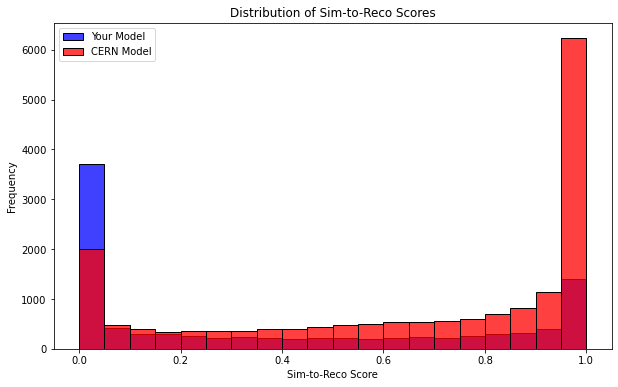

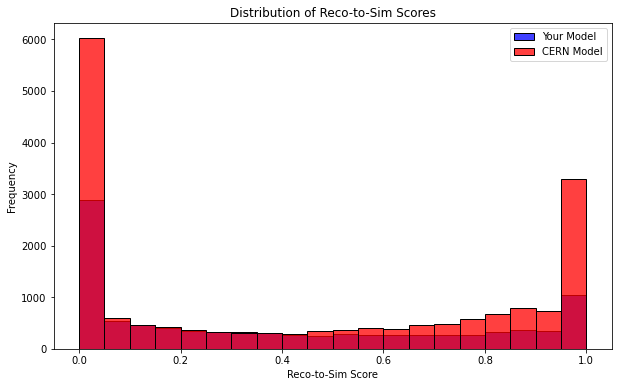

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Plotting Sim-to-Reco Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(df_scores['sim_to_reco_score'], bins=20, label='Your Model', color='blue')
sns.histplot(df_CERN['sim_to_reco_score'], bins=20, label='CERN Model', color='red')
plt.title('Distribution of Sim-to-Reco Scores')
plt.xlabel('Sim-to-Reco Score')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# ----- Plotting Reco-to-Sim Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(df_scores['reco_to_sim_score'], bins=20, label='Your Model', color='blue')
sns.histplot(df_CERN['reco_to_sim_score'], bins=20, label='CERN Model', color='red')
plt.title('Distribution of Reco-to-Sim Scores')
plt.xlabel('Reco-to-Sim Score')
plt.ylabel('Frequency')

plt.legend()
plt.show()


In [18]:
# Assuming 'df' is your dataframe
max_sim_to_reco_score = df_CERN['sim_to_reco_score'].max()
max_reco_to_sim_score = df_CERN['reco_to_sim_score'].max()

print("Maximum sim-to-reco score:", max_sim_to_reco_score)
print("Maximum reco-to-sim score:", max_reco_to_sim_score)

Maximum sim-to-reco score: 1.0
Maximum reco-to-sim score: 1.0


# Plot vs params

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Preprocessing ----
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Map Required Columns from df_scores to df_CERN
event_mapping = df_scores[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation']].drop_duplicates('event_index')
df_CERN = pd.merge(df_CERN, event_mapping, on='event_index', how='left')

# ---- Efficiency and Purity Calculation ----
def calculate_efficiency_purity(df):
    # Efficiency
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    cp_efficiency = cp_associated.groupby(level=0).mean().reset_index(name='efficiency')
    cp_valid = cp_valid.merge(cp_efficiency, on='event_index', how='left')

    # Purity
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    tst_purity = tst_associated.groupby(level=0).mean().reset_index(name='purity')
    tst_valid = tst_valid.merge(tst_purity, on='event_index', how='left')

    # Merge into a single DataFrame
    df_plot = pd.merge(cp_valid[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation', 'efficiency']],
                       tst_valid[['event_index', 'purity']],
                       on='event_index',
                       how='inner')
    return df_plot

df_plot = calculate_efficiency_purity(df_scores)
df_plot_CERN = calculate_efficiency_purity(df_CERN)

# ---- Binning ----
eta_bins = np.linspace(df_plot['cp_avg_eta'].min(), df_plot['cp_avg_eta'].max(), 10)
energy_bins = np.linspace(df_plot['cp_energy'].min(), df_plot['cp_energy'].max(), 10)  # Capped at 225
separation_bins = np.linspace(df_plot['cp_separation'].min(), df_plot['cp_separation'].max(), 10)

df_plot['eta_bin'] = pd.cut(df_plot['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot['energy_bin'] = pd.cut(df_plot['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot['separation_bin'] = pd.cut(df_plot['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

df_plot_CERN['eta_bin'] = pd.cut(df_plot_CERN['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot_CERN['energy_bin'] = pd.cut(df_plot_CERN['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot_CERN['separation_bin'] = pd.cut(df_plot_CERN['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

def calculate_bin_error(numerator, denominator):
    if denominator > 0:
        efficiency = numerator / denominator
        error = np.sqrt(efficiency * (1 - efficiency) / denominator)
    else:
        efficiency = 0.0
        error = 0.0
    return efficiency, error

def aggregate_bins(data, bin_col):
    return data.groupby(bin_col).apply(lambda g: pd.Series({
        'efficiency_mean': g['efficiency'].mean(),
        'efficiency_error': calculate_bin_error(g['efficiency'].sum(), len(g))[1],
        'purity_mean': g['purity'].mean(),
        'purity_error': calculate_bin_error(g['purity'].sum(), len(g))[1],
        'count': len(g) // 4
    })).reset_index()

# Aggregate Data
eta_group = aggregate_bins(df_plot, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group = aggregate_bins(df_plot, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group = aggregate_bins(df_plot, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

eta_group_CERN = aggregate_bins(df_plot_CERN, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group_CERN = aggregate_bins(df_plot_CERN, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group_CERN = aggregate_bins(df_plot_CERN, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

# Fill Missing Values
for group in [eta_group_CERN, energy_group_CERN, separation_group_CERN]:
    group.fillna({'efficiency_mean': np.nan, 'efficiency_error': np.nan,
                  'purity_mean': np.nan, 'purity_error': np.nan, 'count': 0}, inplace=True)

# ---- Plotting ----
def plot_metric(x_bins, group, group_CERN, xlabel, ylabel, title, efficiency_color, purity_color):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Your Model
    ax1.plot(x_bins, group['efficiency_mean'], marker='o', linestyle='-', color=efficiency_color, label='Efficiency (Your Model)')
    ax1.plot(x_bins, group['purity_mean'], marker='o', linestyle='-', color=purity_color, label='Purity (Your Model)')

    # CERN Model
    ax1.plot(x_bins, group_CERN['efficiency_mean'], marker='x', linestyle='--', color='red', label='Efficiency (CERN)')
    ax1.plot(x_bins, group_CERN['purity_mean'], marker='x', linestyle='--', color='orange', label='Purity (CERN)')

    ax1.set_ylim(0, 1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax1.grid()

    ax2.bar(x_bins, group['count'], width=(x_bins[1] - x_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
    ax2.set_ylabel('Number of Events')
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.show()

# Plot Each Metric
plot_metric(eta_bins[:-1], eta_group, eta_group_CERN, 'Average Eta Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_avg_eta', 'blue', 'green')
plot_metric(energy_bins[:-1], energy_group, energy_group_CERN, 'Energy Bin (Capped at 225)', 'Efficiency / Purity', 'Efficiency, Purity vs cp_energy', 'orange', 'green')
plot_metric(separation_bins[:-1], separation_group, separation_group_CERN, 'Separation Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_separation', 'red', 'purple')


KeyError: "['cp_avg_eta', 'cp_energy', 'cp_separation'] not in index"

# Plotting Sigma

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_energy_diff_vs_separation(df_scores):
    """
    Plot energy difference ratio metrics (mean and sigma) against CaloParticle separation.

    Parameters:
    - df_scores: DataFrame containing the calculated scores and features for events.

    Returns:
    - None (plots are displayed).
    """
    # Filter to include only associated events (reco-to-sim score < 0.2)
    associated_scores = df_scores[df_scores['reco_to_sim_score'] < 0.2]

    # Define bins for cp_separation
    separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
    associated_scores['separation_bin'] = pd.cut(
        associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True
    )

    # Initialize lists to store results
    separation_bin_centers = []
    sigma_values = []
    mean_values = []
    event_counts = []

    # Loop through each separation bin
    for bin_idx in range(len(separation_bins) - 1):
        # Select data for the current bin
        bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
        
        # Skip if no data in this bin
        if bin_data.empty:
            continue
        
        # Fit a Gaussian to the data
        mu, sigma = norm.fit(bin_data)
        
        # Store results
        bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
        separation_bin_centers.append(bin_center)
        sigma_values.append(sigma)
        mean_values.append(mu)
        event_counts.append(len(bin_data))

        # Plot example histograms for the first and middle bins
        if bin_idx == 0 or bin_idx == len(separation_bins) // 2:
            plt.figure(figsize=(8, 6))
            plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
            xmin, xmax = plt.xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, sigma)
            plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
            plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
            plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
            plt.ylabel('Density')
            plt.legend()
            plt.grid()
            plt.show()

    # Plot σ (sigma) vs Separation
    plt.figure(figsize=(10, 6))
    plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
    plt.xlabel('Separation')
    plt.ylabel('Sigma (σ)')
    plt.title('Sigma vs Separation')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot μ (mean) vs Separation
    plt.figure(figsize=(10, 6))
    plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
    plt.xlabel('Separation')
    plt.ylabel('Mean (μ)')
    plt.title('Mean vs Separation')
    plt.grid()
    plt.legend()
    plt.show()




/tmp/ipykernel_2766516/3855021492.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)


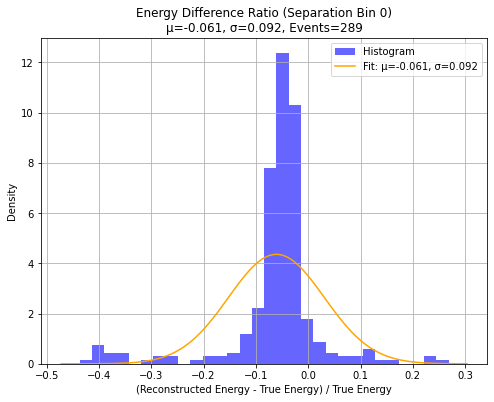

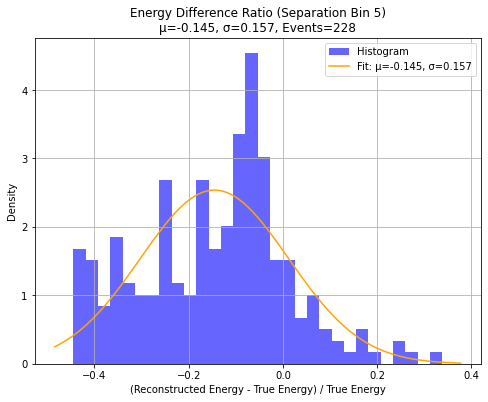

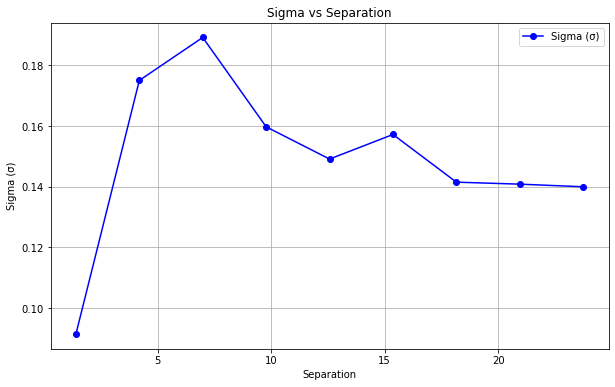

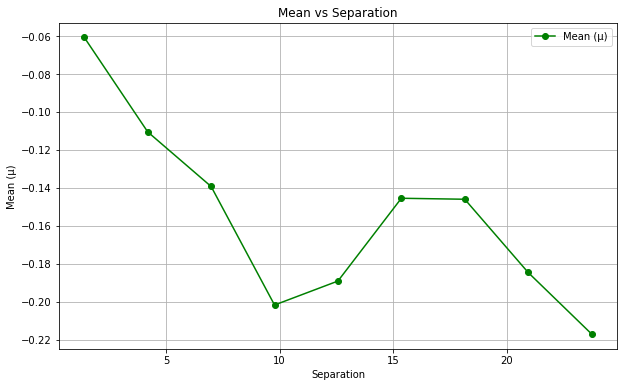

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter to include only associated events (reco-to-sim score < 0.2)
associated_scores = df_CERN[df_CERN['reco_to_sim_score'] < 0.2]

# Define bins for cp_separation
separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

# Initialize lists to store results
separation_bin_centers = []
sigma_values = []
mean_values = []
event_counts = []

# Loop through each separation bin
for bin_idx in range(len(separation_bins) - 1):
    # Select data for the current bin
    bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
    
    # Skip if no data in this bin
    if bin_data.empty:
        continue
    
    # Fit a Gaussian to the data
    mu, sigma = norm.fit(bin_data)
    
    # Store results
    bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
    separation_bin_centers.append(bin_center)
    sigma_values.append(sigma)
    mean_values.append(mu)
    event_counts.append(len(bin_data))

    # Plot a couple of example histograms for reference
    if bin_idx == 0 or bin_idx == len(separation_bins) // 2:  # Example: First and middle bins
        plt.figure(figsize=(8, 6))
        plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
        plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
        plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

# Plot σ (sigma) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
plt.xlabel('Separation')
plt.ylabel('Sigma (σ)')
plt.title('Sigma vs Separation')
plt.grid()
plt.legend()
plt.show()

# Plot μ (mean) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
plt.xlabel('Separation')
plt.ylabel('Mean (μ)')
plt.title('Mean vs Separation')
plt.grid()
plt.legend()
plt.show()


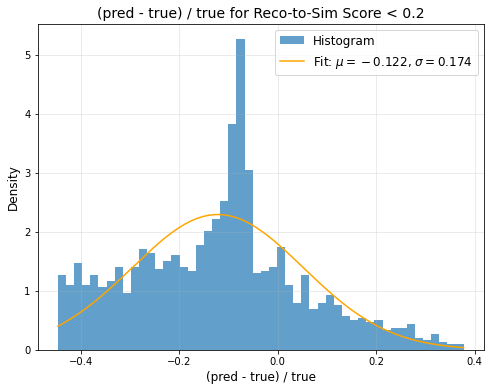

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for reco-to-sim scores < 0.2
filtered_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Calculate the (pred - true) / true for energy_diff_ratio (or adjust the column name as needed)
# Assuming 'energy_diff_ratio' is the column of interest for (pred - true) / true
values = filtered_df['energy_diff_ratio']

# Plot the histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(values, bins=50, density=True, alpha=0.7, label='Histogram')

# Fit a Gaussian distribution to the data
mu, sigma = np.mean(values), np.std(values)
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, label=f'Fit: $\mu={mu:.3f}$, $\sigma={sigma:.3f}$', color='orange')

# Add labels and title
plt.title('(pred - true) / true for Reco-to-Sim Score < 0.2', fontsize=14)
plt.xlabel('(pred - true) / true', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Save or show the plot
plt.show()


/tmp/ipykernel_2766516/776054542.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)


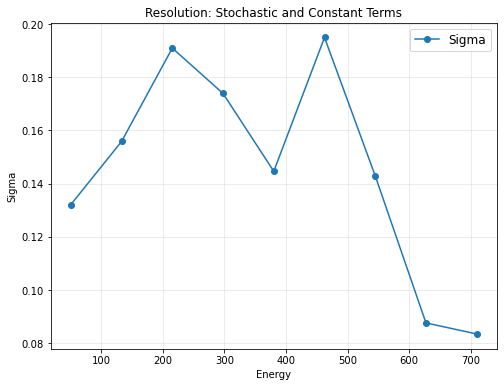

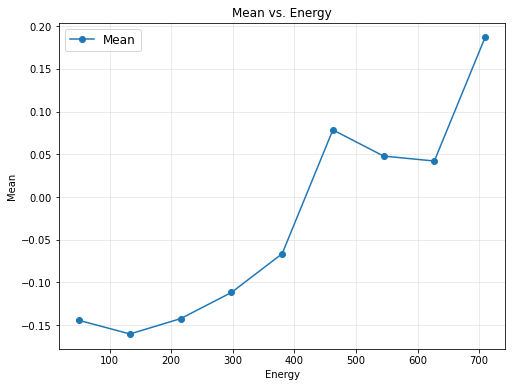

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for tracksters that have been reconstructed (reco_to_sim_score < 0.2)
reconstructed_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Group the data into energy bins
energy_bins = np.linspace(reconstructed_df['trackster_energy'].min(), reconstructed_df['trackster_energy'].max(), 10)
reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)

# Initialize lists to store results
bin_centers = []
sigmas = []
means = []

# Loop over each bin
for energy_bin, group in reconstructed_df.groupby('energy_bin'):
    if group.empty:
        continue

    # Calculate the bin center
    bin_center = (energy_bin.left + energy_bin.right) / 2
    bin_centers.append(bin_center)

    # Fit a Gaussian to the (pred - true) / true values
    values = group['energy_diff_ratio']
    mu, sigma = norm.fit(values)

    # Store the mean and sigma
    means.append(mu)
    sigmas.append(sigma)

# Plot sigma vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, sigmas, 'o-', label='Sigma')
plt.title('Resolution: Stochastic and Constant Terms')
plt.xlabel('Energy')
plt.ylabel('Sigma')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Plot mean vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, means, 'o-', label='Mean')
plt.title('Mean vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Mean')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


# ROC curve

In [ ]:
print()

In [ ]:
from itertools import combinations
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

separation_thresholds = np.arange(0, df_scores['cp_separation'].max() + 10, 10)


# Initialize lists for ROC points
tpr_list = []
fpr_list = []

# Loop over separation thresholds
for threshold in separation_thresholds:
    global_TP = 0  # True Positives
    global_FP = 0  # False Positives
    global_FN = 0  # False Negatives
    global_TN = 0  # True Negatives

    # Filter events by separation threshold
    valid_events = df_scores[df_scores['cp_separation'] <= threshold]['event_index'].unique()

    for event_idx in valid_events:
        try:
            # Extract event data
            event = data_test[event_idx]
            true_labels_event = event.assoc[:, 0]  # Ground truth cluster labels
            pred_trackster_labels = np.array(all_cluster_labels[event_idx])  # Predicted labels

            # Generate all possible pairs of tracksters
            trackster_pairs = list(combinations(range(len(true_labels_event)), 2))

            # Initialize sets
            P_V = set()  # Ground truth pairs
            P_U = set()  # Predicted pairs
            P_X = set(trackster_pairs)  # All pairs

            for i, j in trackster_pairs:
                if true_labels_event[i] == true_labels_event[j]:
                    P_V.add((i, j))  # Ground truth edge
                if pred_trackster_labels[i] == pred_trackster_labels[j]:
                    P_U.add((i, j))  # Predicted edge

            # Calculate Confusion Matrix
            TP = len(P_V & P_U)  # True Positive
            FN = len(P_V - P_U)  # False Negative
            FP = len(P_U - P_V)  # False Positive
            TN = len(P_X - (P_V | P_U))  # True Negative

            # Update global counts
            global_TP += TP
            global_FP += FP
            global_FN += FN
            global_TN += TN

        except Exception as e:
            print(f"Error processing event {event_idx}: {e}")
            continue

    # Calculate TPR and FPR for the current threshold
    global_TPR = global_TP / (global_TP + global_FN) if (global_TP + global_FN) > 0 else 0
    global_FPR = global_FP / (global_FP + global_TN) if (global_FP + global_TN) > 0 else 0

    # Append to lists
    tpr_list.append(global_TPR)
    fpr_list.append(global_FPR)
    
# Check conditions for removing the first point
if len(fpr_list) > 1 and len(tpr_list) > 1:
    if (fpr_list[1] > fpr_list[0]) or (tpr_list[1] <= tpr_list[0]):
        print("Removing the first point from fpr_list and tpr_list due to conditions.")
        fpr_list.pop(0)
        tpr_list.pop(0)
        




# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using cp_separation as Threshold')
plt.legend(loc="lower right")
plt.show()


In [ ]:
fpr_list.sort()
tpr_list.sort()

# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using cp_separation as Threshold')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define separation thresholds (e.g., 0, 5, 10, ..., max separation in dataset)
separation_thresholds = np.arange(0, df_scores['cp_separation'].max() + 10, 10)
score_threshold = 0.2  # Fixed threshold for both scores

# Initialize lists for ROC points
tpr_list = []
fpr_list = []

# Loop over separation thresholds
for separation in separation_thresholds:
    global_TP = 0  # True Positives
    global_FP = 0  # False Positives
    global_FN = 0  # False Negatives
    global_TN = 0  # True Negatives

    # Filter events by cp_separation threshold
    valid_events = df_CERN[df_CERN['cp_separation'] <= separation]['event_index'].unique()

    for event_idx in valid_events:
        try:
            # Filter pairs for this event
            event_pairs = df_CERN[df_CERN['event_index'] == event_idx]
            
            # Extract scores
            sim_to_reco_scores = event_pairs['sim_to_reco_score'].values
            reco_to_sim_scores = event_pairs['reco_to_sim_score'].values

            # Loop through each pair
            for sim_score, reco_score in zip(sim_to_reco_scores, reco_to_sim_scores):
                if sim_score < score_threshold and reco_score < score_threshold:
                    global_TP += 1  # True Positive
                elif reco_score < score_threshold and sim_score > score_threshold:
                    global_FP += 1  # False Positive
                elif sim_score < score_threshold and reco_score > score_threshold:
                    global_FN += 1  # False Negative
                elif sim_score > score_threshold and reco_score > score_threshold:
                    global_TN += 1  # True Negative

        except Exception as e:
            print(f"Error processing event {event_idx}: {e}")
            continue

    # Calculate TPR and FPR for the current separation threshold
    global_TPR = global_TP / (global_TP + global_FN) if (global_TP + global_FN) > 0 else 0
    global_FPR = global_FP / (global_FP + global_TN) if (global_FP + global_TN) > 0 else 0

    # Append to lists
    tpr_list.append(global_TPR)
    fpr_list.append(global_FPR)

# Pair FPR and TPR together
roc_points = list(zip(fpr_list, tpr_list))

# Sort by FPR in descending order
roc_points.sort(key=lambda x: x[0], reverse=True)

# Remove non-monotonic points
filtered_points = []
prev_fpr = float('inf')  # Start with a very large value for FPR

for fpr, tpr in roc_points:
    if fpr <= prev_fpr:
        filtered_points.append((fpr, tpr))
        prev_fpr = fpr

# Unzip into FPR and TPR lists
fpr_list, tpr_list = zip(*filtered_points)

# Convert back to lists
fpr_list = list(fpr_list)
tpr_list = list(tpr_list)

# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)



# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using Fixed Threshold (0.2) and Varying Separation')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(fpr_list)

In [ ]:
print(tpr_list)

In [ ]:

# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)

In [ ]:
print(tpr_list)

# Test

In [ ]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Define a simple Event class
class Event:
    def __init__(self, x, assoc):
        self.x = x  # Tensor or numpy array
        self.assoc = assoc  # Tensor or numpy array


In [ ]:
# Define particles as per the numerical example
# Columns: x, y, z, energy, eta
# Particle 0: (0,0,0), 10, 1.0, cp=0, tst=0
# Particle 1: (1,0,0), 20, 1.1, cp=0, tst=0
# Particle 2: (0,1,0), 30, 2.0, cp=1, tst=1
# Particle 3: (1,1,0), 40, 2.1, cp=1, tst=1

# Create x: shape (num_particles, 5)
x = np.array([
    [0, 0, 0, 10, 1.0],
    [1, 0, 0, 20, 1.1],
    [0, 1, 0, 30, 2.0],
    [1, 1, 0, 40, 2.1],
])

# Create assoc: shape (num_particles, 1)
assoc = np.array([
    [0],
    [0],
    [1],
    [1],
])

# Create a single event
event = Event(x=x, assoc=assoc)

# data_test contains one event
data_test = [event]

# Define all_cluster_labels: list of lists, one per event
# For event 0: Trackster 0 contains particles 0 and 1, Trackster 1 contains 2 and 3
all_cluster_labels = [
    [0, 0, 1, 1]
]


In [ ]:
# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.astype(int) if isinstance(true_labels_event, np.ndarray) else true_labels_event.int().numpy()
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    # Append to all_scores
                    all_scores.append({
                        'event_index': event_idx,
                        'cp_id': cp,
                        'trackster_id': tst,
                        'sim_to_reco_score': 0.0,
                        'reco_to_sim_score': 1.0,
                        'cp_energy': cp_total_energy[cp],
                        'trackster_energy': tst_total_energy[tst],
                        'cp_avg_eta': cp_avg_eta[cp],
                        'cp_separation': cp_separation,
                        'energy_diff_ratio': (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]
                    })
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })


In [ ]:
# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores)


In [ ]:
print('yay')

# Check other data

In [ ]:
import uproot

In [ ]:
file = uproot.open('/vols/cms/bmaier/hgcal/data/20230701_multi_particles/test/raw/particles_10_8373759_ntuple.root')

In [ ]:
print(file.keys())

In [ ]:
track = file['ticlNtuplizer/tracksters;1']

In [ ]:
print(track.keys())

In [ ]:
v_x = track['barycenter_x'].array()

In [ ]:
print(len(v_x[0]))